In [ ]:
# # # 6.12 ▶ Final Assignment: Advanced Algorithms Design (session: July 8) - Final Assignment for Classiq Certificate 2

# # # Student: Marcia Hon (marcia.hon.29@gmail.com)
# # # Date: Thursday July 25, 2024

# # # (https://github.com/Classiq/classiq-library/blob/main/community/womanium/assignments/assignment_4.md)

# Follow the example from the 4th session for creating the quantum walk operator for the case of a circle with 4 nodes,
# and design the quantum walk operator for the case of a line with 16 nodes.# 
# Create a well-detailed Python Jupyter notebook that explains your algorithm, including the code parts covered in class, 
# and pictures/figures where relevant. Utilize the attached Python code (quantum_walk_circle_example.py)
# with the example from class for the task. Feel free to extend the example beyond the requirements here and what was covered in class.
# Contribute your notebook to the Classiq Git Library to the folder community/womanium/assignment


# 
# EXPLANATIONS
# 1. Classical Random Walks: a particle moves on a graph and at each step the movement is based on probabilistes.
# 2. Quantum Random Walks: 
#       - same as Classical Random Walks however, the movements are based on quantum mechanical principles such as superposition and inteference.
#       - a quantum state of a particle is in a superposition of multiple position and the movement rules use unitary opeators.
# 3. Important Ideas of Quantum Random Walks: 
#       - Quantum Superposition: a quantum particle is in a superposition of multiple states simultaeously.
#       - Quantum Interference: amplitudes of different routes combine to change the probability of outcomes. 
#       - Quantum Gates: used to manipulate the quantum state and position of a prticle. 
# 4. Quantum Random Walk Along A Line: 
#       - it is 1D.
#       - particle starts at a position on line and can move to adjacaent psitions only.
#       - these movements follow unitary operations instead of probabilisies.
# 5. Quantum Walk Algrithmm: 
#       - 1. Initialization: start with a quantum state. 
#       - 2. Superposition: use Hadamard and other gates to do superpositions. 
#       - 3. Progress: apply unitary opeators.
#       - 4. Measure: get the final state probablitiess. 
# 6. Applications: 
#       - Can be used in many other Algorithms such as Grover's. As well, it could be used for parallelism as well as information procssing.
# 

#
# CHANGES TO ORIGINAL CODE
# 1. edges from graph to line: 
#       - To create a graph for a line, we subtract two nodes. If the differencs of these two nodese is +/-1, then it is an edge.
# 2. sizes of algorithmn: 
#       - To accommodate the 16 nodes, size and W_iteration had to be modified. 
#       - Size is changed to 4 because 2**4 is 16 nodes. 
#       - Basically, the walk is with equal probability left (50%) and right (50%). The corner cases have probability of 1 because they are the only directions possible.
# 3. IDE Execution: 
#       - 16 nodes is a large number whose results could not be shown inClassiq IDE.

#
# ALGORITHM EXPLANATIONS
# The Quantum Random Walk consists of two major components: Coin Operator (determines the movement probabilities) and Shift Operator (the actual movement)
#
# Coin Operator consists of these functions: prepare_minus, diffuzer_oracle, zero_diffuzer, W_iteration, & W_operator
# It assigns amplitudes to move left or right given a node. In our 16 nodes, at nodes 1 and 16, 1 can only move 100% to 2 and 16 can only move 100% to 15.
# In between, coin operator can assigned probabilites evenly left (50%) or right (50%).
# The coin operator transforms the walker's state by assigning amplitudes to move left or right from each node. For instance, if the walker is at node 0,
#
# Shift Operator consists of these functions: edge_oracle, bitwise_swap, & S_operator
# After assigning movement probabilites, Shift Operator is used. It swaps the walk's state to amplitudes set by the coin operator.
# An example is moving from 5 to either 6 or 4. Here the Shift Operator changes the state for the new position.
# At this point, quantum interference occurs and the amplitudes of different paths increase/decrease certain outcomes.


#
# ALGORITHM BREAKDOWN
# <Coin Operator>: 
# 1. prepare_minus: flips qubit and puts it in superposition.
# 2. diffuzzer_oracle: uses extra qubit to check if x is non-zero, if so, flip it. 
# 3. zero_diffuzer: prepare a extra qubit to check if state is zero.  
# 4. W_iteration: sets up quantum state and moves right of left based on probabilities. 
# 5. W_operator: does the random walk for all possible states in 16 nodes.
# <Shift Operator>:
# 6. edge_oracle: checks if two nodes are conected.
# 7. bitwise_swap: swaps states.
# 8. S_operator: checks if 2 nodes are connected by edge, if so, swaps them.
#
# 9. main: initializes system and does random walk.

# 
# RESULTS
# I implemented the Quantum Random Walk for 16 nodes.
# However, 37 qubits are needed but Classiq can only accommodate 25. Thus, the results were not able to be shown.
# The following are the images of the circuit that was synthesized and then the code.

In [ ]:
# RESULTS - IMAGES OF THE CIRCUIT
# The following is the first half of the circuit. Next, we have the second half of the circuit.
# We can see all the necessary qubits plus combinations of gates.
# Plus, we can see the major sections: Hadamard_transform, W_Operator, and S_Operator as are specified in "main".


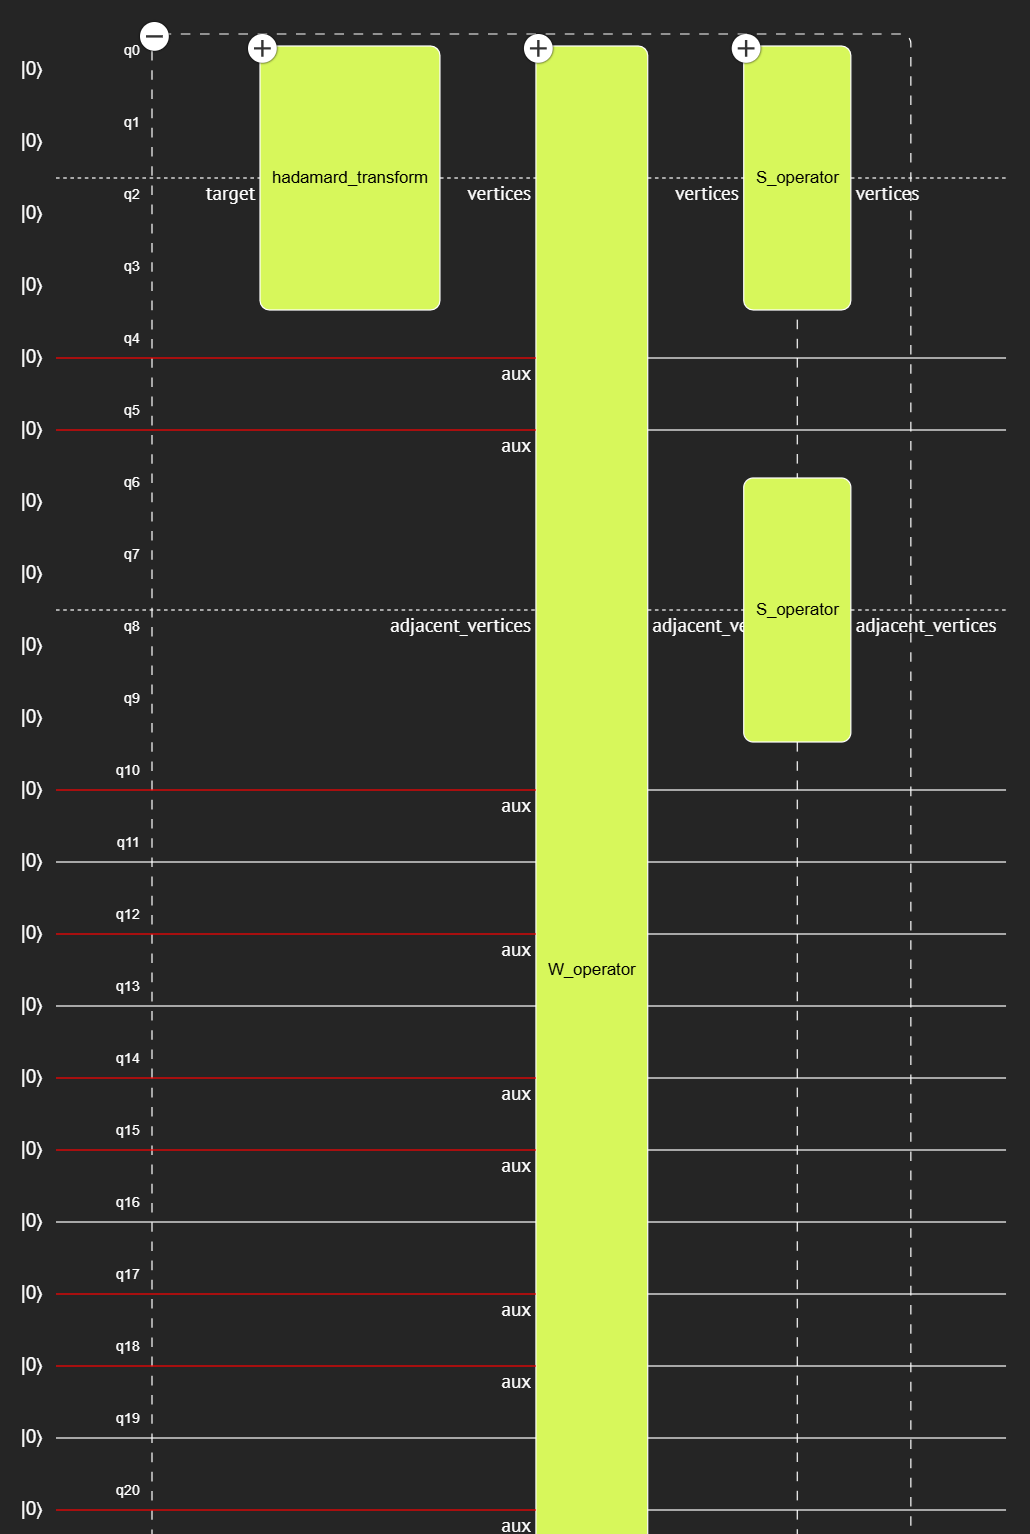

In [4]:
import base64
from IPython.display import HTML

# Encode image to base64
with open('./Marcia_Hon_hw4_img01.ipynb.png', 'rb') as f:
    data = f.read()
    encoded = base64.b64encode(data).decode('utf-8')

# Create HTML to embed the image
html = f'<img src="data:image/png;base64,{encoded}"/>'

# Display the image
HTML(html)


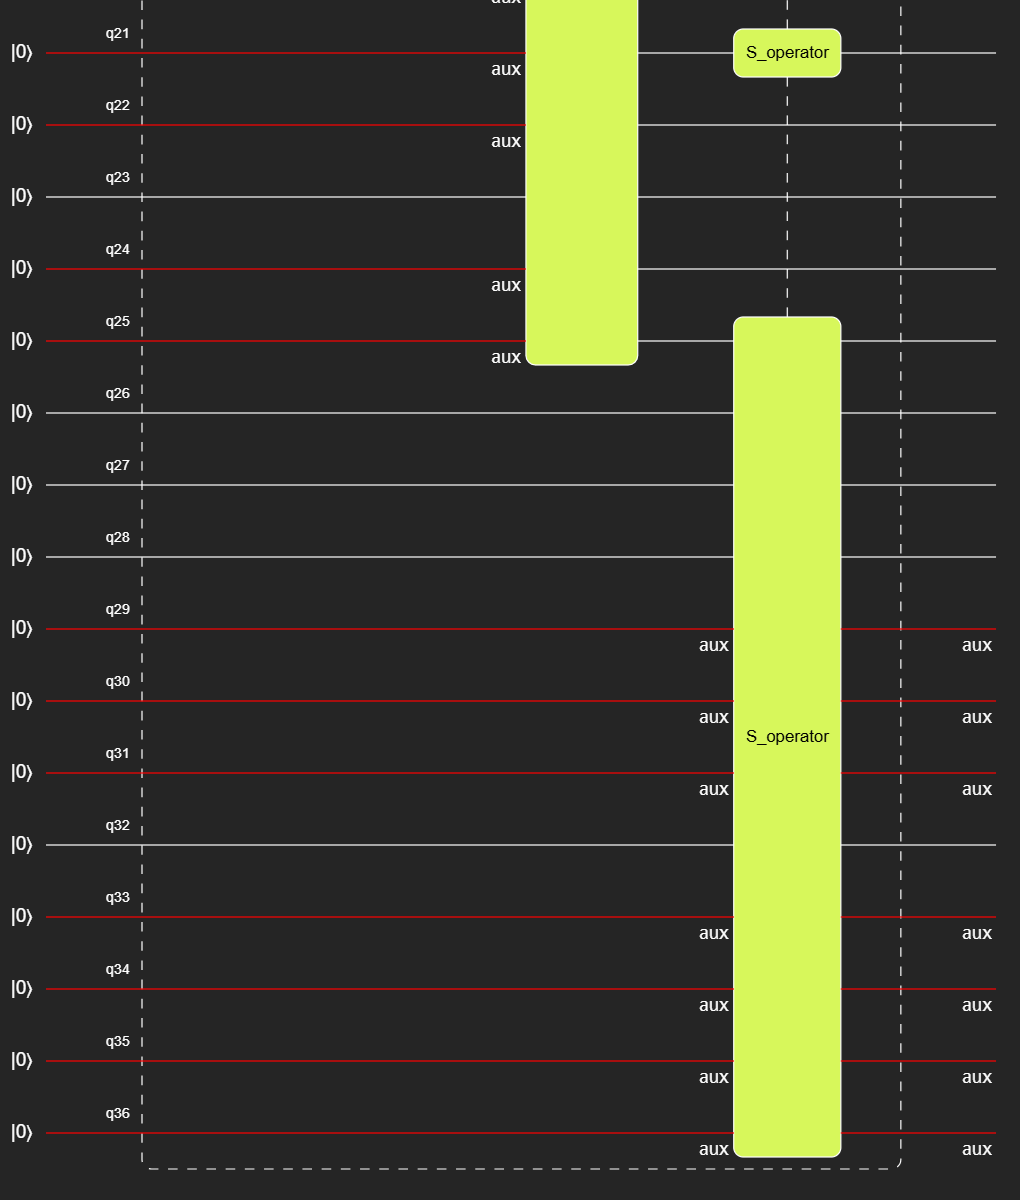

In [6]:
import base64
from IPython.display import HTML

# Encode image to base64
with open('./Marcia_Hon_hw4_img02.ipynb.png', 'rb') as f:
    data = f.read()
    encoded = base64.b64encode(data).decode('utf-8')

# Create HTML to embed the image
html = f'<img src="data:image/png;base64,{encoded}"/>'

# Display the image
HTML(html)

In [ ]:
# RESULTS - CODE
# The following is the whole code for the Quantum Random Walk of 16 linear nodes.
# It runs correctly with the results showing the 16 states plus a link to the classiq IDE.
# The explanations were given at the beginning of this report.
# The outcomes where not able to be generated in classiq due to "37 qubits are needed but Classiq can only accommodate 25".

In [3]:
from classiq import *

@qfunc
# Prepares qubit into |-> state
def prepare_minus(x: QBit):
  X(x)
  H(x)

@qfunc
# Diffuser oracle for Grover's algorithm - if non-zero flip it.
def diffuzer_oracle(aux: Output[QNum],x:QNum):
  aux^=(x!=0)

@qfunc
# Zero diffuser for the quantum walk - check if state is zero
def zero_diffuzer(x: QNum):
  aux = QNum('aux')
  allocate(1,aux)
  within_apply(compute=lambda: prepare_minus(aux),
              action=lambda: diffuzer_oracle)

# CHANGES TO THE CODE
#   - size = 4 becuase 2**4 = 16 nodes
#   - prob = Initial state of all zeros which are updated if the node has a neighbour and direction to go.
size = 4
# Defines the quantum states for the quantum walk based on probabilities
def W_iteration(i:int,vertices: QNum, adjacent_vertices:QNum):
    prob = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    prob[(i+1)% 16]=0.5
    prob[(i-1)% 16]=0.5

    if i == 0:
        prob = [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

    if i == 15:
        prob = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]
        
    print(f'State={i}, prob vec ={prob}')
    
    control(ctrl=vertices==i,
            operand=lambda: within_apply(
              compute= lambda: inplace_prepare_state(probabilities=prob, bound=0.01, target=adjacent_vertices),
              action= lambda: zero_diffuzer(adjacent_vertices)))

@qfunc 
# Applies the quantum states (W_iteration) to all vertices.
def W_operator(vertices:QNum, adjacent_vertices: QNum):
    for i in range(2**size):
      W_iteration(i,vertices,adjacent_vertices)


# CHANGES TO THE CODE
#   - from circle to line
#   - in a line, nodes next to each other have a difference of either +1 / -1
@qfunc
# Checks if two edges are adjacent.
def edge_oracle(res:Output[QBit], vertices: QNum, adjacent_vertices: QNum):
    res |= (((vertices-adjacent_vertices) == 1)  | ((vertices-adjacent_vertices) == -1))


@qfunc 
# Swaps the values of Arrays
def bitwise_swap(x: QArray[QBit], y:QArray[QBit]):
  repeat(count= x.len,
    iteration= lambda i: SWAP(x[i],y[i]))
  

@qfunc 
# Swaps vertices with their adjacent vertices.
def S_operator(vertices:QNum, adjacent_vertices: QNum):
    res = QNum('res')
    edge_oracle(res,vertices,adjacent_vertices)
    control(ctrl= res==1,
        operand= lambda: bitwise_swap(vertices,adjacent_vertices))

@qfunc 
# Function to perform Quantum Walk
def main(vertices:Output[QNum], adjacent_vertices:Output[QNum]):

  allocate(size,vertices)
  hadamard_transform(vertices)
  allocate(size,adjacent_vertices)

  W_operator(vertices,adjacent_vertices)
  S_operator(vertices,adjacent_vertices)

# Classiq Results
quantum_model = create_model(main)
quantum_program = synthesize(quantum_model)
show(quantum_program)

State=0, prob vec =[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=1, prob vec =[0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=2, prob vec =[0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=3, prob vec =[0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=4, prob vec =[0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=5, prob vec =[0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=6, prob vec =[0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
State=7, prob vec =[0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0]
State=8, prob vec =[0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0]
State=9, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0]
State=10, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0]
State=11, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0]
State=12, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0]
State=13, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 